In [40]:
import uproot
import numpy as np
from matplotlib import pyplot as plt
import mplhep as hep

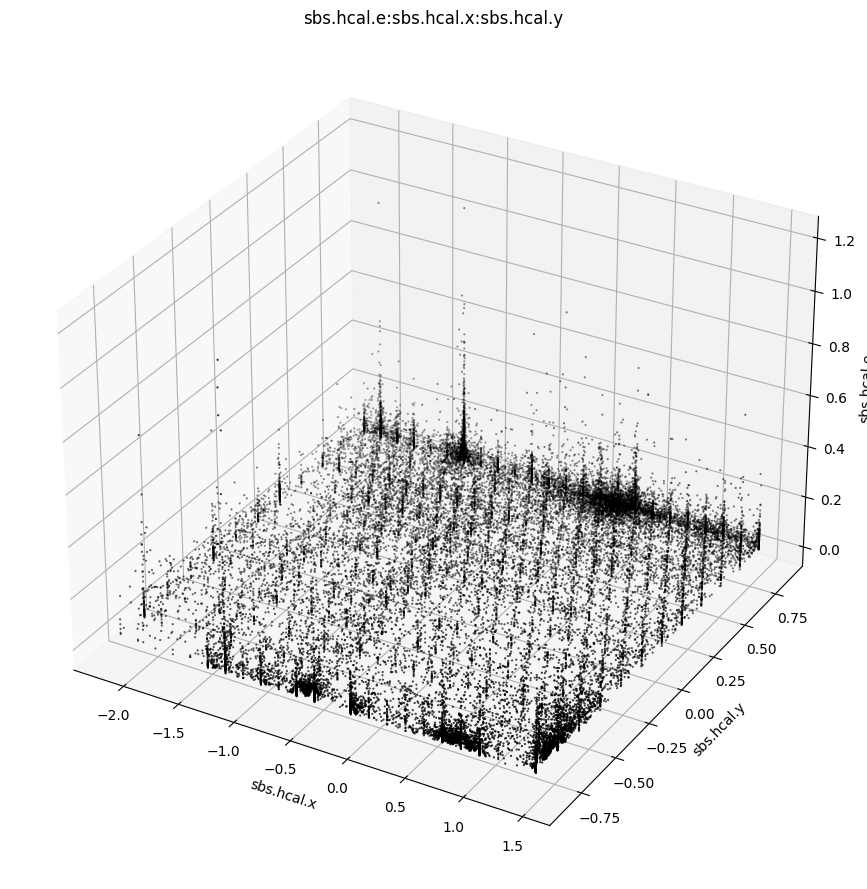

In [30]:
# create TTree object
T = uproot.open("hcal_gmn_fullreplay_13747_stream0_seg0_0.root:T")
 
# retrieve data from TTree
x = np.array(T["sbs.hcal.x"].array())
y = np.array(T["sbs.hcal.y"].array())
e = np.array(T["sbs.hcal.e"].array())

# Creating figure
fig = plt.figure(figsize = (13, 11))
ax = plt.axes(projection ="3d")
ax.set_xlabel('sbs.hcal.x')
ax.set_ylabel('sbs.hcal.y')
ax.set_zlabel('sbs.hcal.e')

# Creating plot
ax.scatter3D(x, y, e, color="black", s=0.3) # s=size
plt.title("sbs.hcal.e:sbs.hcal.x:sbs.hcal.y")

# show plot
plt.show()

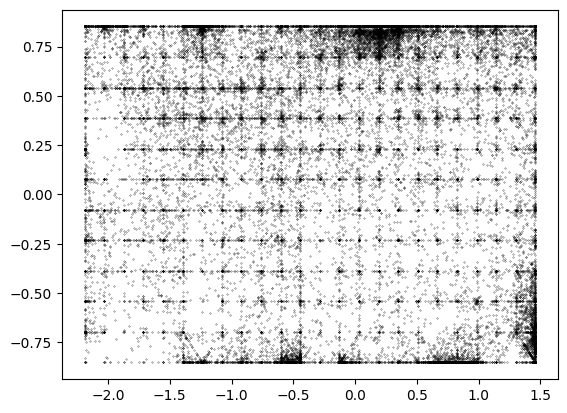

In [31]:
plt.scatter(x, y, c="black", s=0.05)
plt.show()

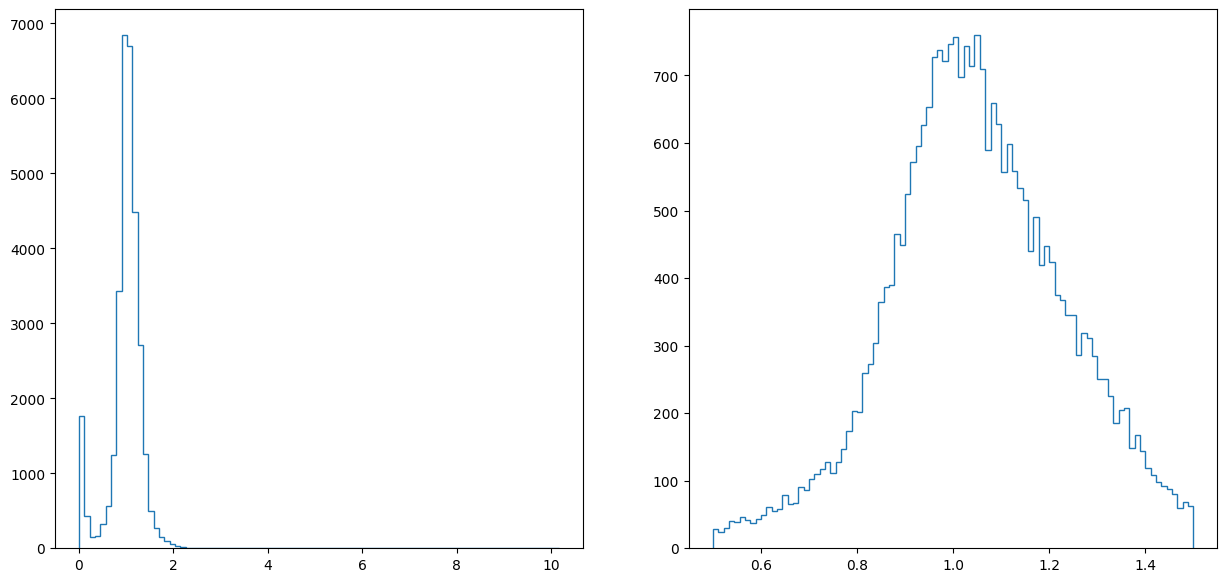

In [75]:
e = T["bb.sh.e"].array()

cut_e = np.array([])

for i in e:
    if i > 0.5 and i < 1.5:
        cut_e = np.append(cut_e, i)

h1, b1 = np.histogram(e, bins=90)
h2, b2 = np.histogram(cut_e, bins=90)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].stairs(h1, b1)
axs[1].stairs(h2, b2)

plt.show()

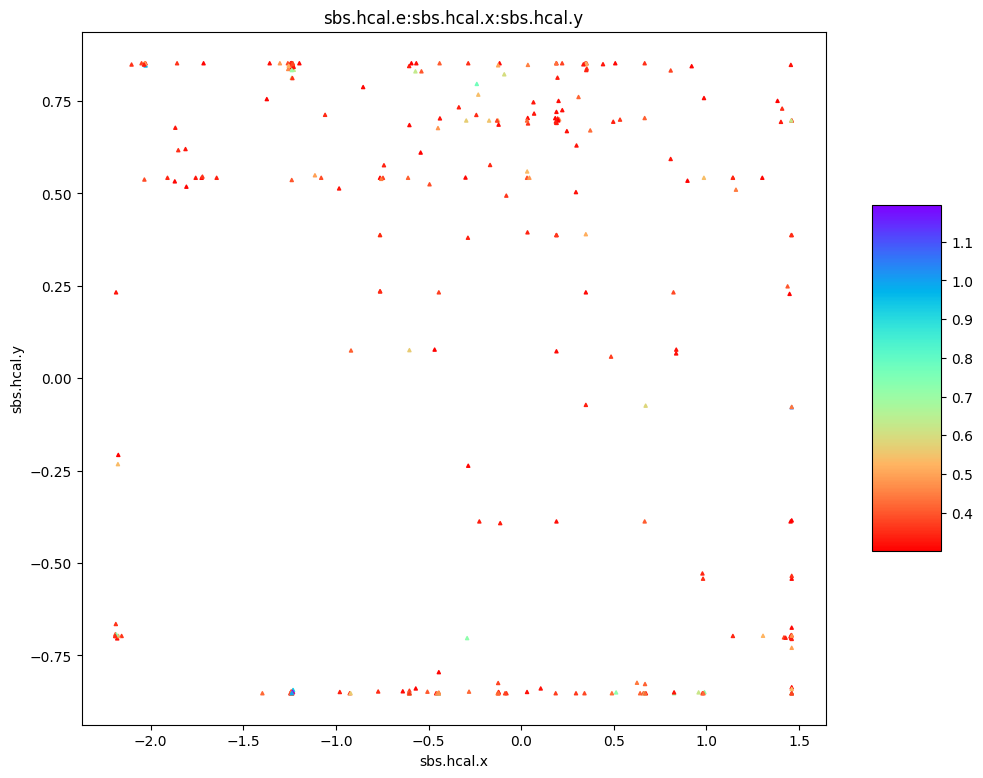

309


In [107]:
cx = np.array([])
cy = np.array([])
ce = np.array([])

for x, y, e in zip(T["sbs.hcal.x"].array(), T["sbs.hcal.y"].array(), T["sbs.hcal.e"].array()):
    if e > 0.3:
        cx = np.append(cx, x)
        cy = np.append(cy, y)
        ce = np.append(ce, e)

# create figure
fig = plt.figure(figsize = (12, 9))
ax = plt.axes()
ax.set_xlabel('sbs.hcal.x')
ax.set_ylabel('sbs.hcal.y')

# create color map
my_cmap = plt.get_cmap('rainbow_r')

# Creating plot
sctt = ax.scatter(cx, cy, c=ce, s=5, cmap=my_cmap, marker='^')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.title("sbs.hcal.e:sbs.hcal.x:sbs.hcal.y")

# show plot
plt.show()
print(len(ce))

$y=x$